In [1]:
# used for manipulating directory paths
import os

import sys
sys.path.insert(0, os.path.abspath('D:\\University 10th Semester\\Machine Learning\\University\\Assignments\\Assignment1'))

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import seaborn as sns

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

# K-fold
from sklearn.model_selection import KFold

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### 1) Features Selection

Text(0.5, 1.0, 'Correlation between all features and output variable')

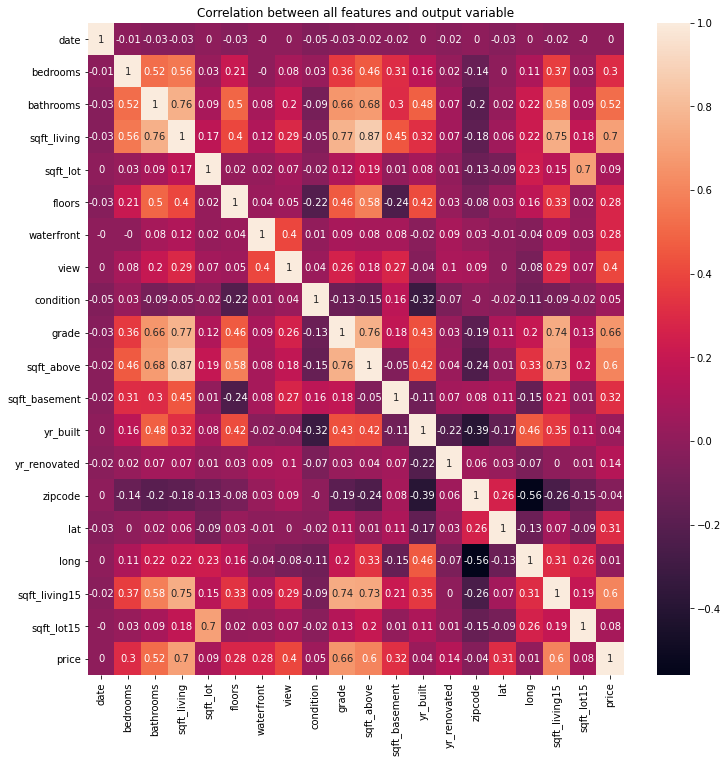

In [2]:
df = pd.read_csv('D:\\University 10th Semester\\Machine Learning\\University\\Assignments\\house_prices_data_training_data.csv')
df.drop('id', inplace=True, axis=1)
correlation_matrix = df.corr().round(2)
figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True).set_title('Correlation between all features and output variable')

In [3]:
# Correlation with output variable
cor_target = abs(correlation_matrix["price"])
relevant_features = cor_target[cor_target>=0.5]
relevant_features

bathrooms        0.52
sqft_living      0.70
grade            0.66
sqft_above       0.60
sqft_living15    0.60
price            1.00
Name: price, dtype: float64

### 2) Model Selection

#### a) Read the Data

In [4]:
data = pd.read_csv('D:\\University 10th Semester\\Machine Learning\\University\\Assignments\\house_prices_data_training_data.csv')

# drop all nan rows
data = data.dropna(how='all')

# drop all columns with very low correlation with the price
data.drop('id', inplace=True, axis=1)
data.drop('date', inplace=True, axis=1)
data.drop('view', inplace=True, axis=1)
data.drop('waterfront', inplace=True, axis=1)
data.drop('zipcode', inplace=True, axis=1)
data.drop('lat', inplace=True, axis=1)
data.drop('long', inplace=True, axis=1)
data.drop('yr_renovated', inplace=True, axis=1)
data.drop('condition', inplace=True, axis=1)
data.drop('sqft_lot', inplace=True, axis=1)
data.drop('sqft_lot15', inplace=True, axis=1)
data.drop('floors', inplace=True, axis=1)
data.drop('yr_built', inplace=True, axis=1)
data.drop('sqft_basement', inplace=True, axis=1)
data.drop('bedrooms', inplace=True, axis=1)

#### b) Functions

In [5]:
def polyFeatures(X, p):
    X_poly = X
    X_temp = X
    for i in range(2, p+1):
        X_poly = np.concatenate([X_poly, np.power(X_temp, i)], axis=1)
    return X_poly

In [6]:
def Normalization(train, validate, test):
    scaler = StandardScaler()
    scaler.fit(train)
    train = scaler.transform(train)
    validate = scaler.transform(validate)
    test = scaler.transform(test)
    
    train = np.concatenate([np.ones((train.shape[0], 1)), train], axis=1)
    validate = np.concatenate([np.ones((validate.shape[0], 1)), validate], axis=1)
    test = np.concatenate([np.ones((test.shape[0], 1)), test], axis=1)

    return train, validate, test

In [7]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    return J

In [8]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]     
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta

#### c) Prepare the Data

In [9]:
data = data.to_numpy()

# Split data into train, validation and test sets
train = data[:10799, :]
validate = data[10799:14399, :]
test = data[14399:, :]

c = train.shape[1] - 1

X_train = train[:, :c]
Y_train = train[:, c]

X_validate = validate[:, :c]
Y_validate = validate[:, c]

X_test = test[:, :c]
Y_test = test[:, c]

In [10]:
# Raise train, validate and test sets to the power suitable for the degree of hypthesis
X_train_d1 = X_train
X_train_d2 = polyFeatures(X_train, 2)
X_train_d3 = polyFeatures(X_train, 3)
X_train_d4 = polyFeatures(X_train, 4)
X_train_d5 = polyFeatures(X_train, 5)
X_train_d6 = polyFeatures(X_train, 6)
X_train_d7 = polyFeatures(X_train, 7)
X_train_d8 = polyFeatures(X_train, 8)
X_train_d9 = polyFeatures(X_train, 9)
X_train_d10 = polyFeatures(X_train, 10)

X_validate_d1 = X_validate
X_validate_d2 = polyFeatures(X_validate, 2)
X_validate_d3 = polyFeatures(X_validate, 3)
X_validate_d4 = polyFeatures(X_validate, 4)
X_validate_d5 = polyFeatures(X_validate, 5)
X_validate_d6 = polyFeatures(X_validate, 6)
X_validate_d7 = polyFeatures(X_validate, 7)
X_validate_d8 = polyFeatures(X_validate, 8)
X_validate_d9 = polyFeatures(X_validate, 9)
X_validate_d10 = polyFeatures(X_validate, 10)

X_test_d1 = X_test
X_test_d2 = polyFeatures(X_test, 2)
X_test_d3 = polyFeatures(X_test, 3)
X_test_d4 = polyFeatures(X_test, 4)
X_test_d5 = polyFeatures(X_test, 5)
X_test_d6 = polyFeatures(X_test, 6)
X_test_d7 = polyFeatures(X_test, 7)
X_test_d8 = polyFeatures(X_test, 8)
X_test_d9 = polyFeatures(X_test, 9)
X_test_d10 = polyFeatures(X_test, 10)

In [11]:
# Mean Normalization
X_train_d1, X_validate_d1, X_test_d1 = Normalization(X_train_d1, X_validate_d1, X_test_d1)
X_train_d2, X_validate_d2, X_test_d2 = Normalization(X_train_d2, X_validate_d2, X_test_d2)
X_train_d3, X_validate_d3, X_test_d3 = Normalization(X_train_d3, X_validate_d3, X_test_d3)
X_train_d4, X_validate_d4, X_test_d4 = Normalization(X_train_d4, X_validate_d4, X_test_d4)
X_train_d5, X_validate_d5, X_test_d5 = Normalization(X_train_d5, X_validate_d5, X_test_d5)
X_train_d6, X_validate_d6, X_test_d6 = Normalization(X_train_d6, X_validate_d6, X_test_d6)
X_train_d7, X_validate_d7, X_test_d7 = Normalization(X_train_d7, X_validate_d7, X_test_d7)
X_train_d8, X_validate_d8, X_test_d8 = Normalization(X_train_d8, X_validate_d8, X_test_d8)
X_train_d9, X_validate_d9, X_test_d9 = Normalization(X_train_d9, X_validate_d9, X_test_d9)
X_train_d10, X_validate_d10, X_test_d10 = Normalization(X_train_d10, X_validate_d10, X_test_d10)

#### d) Train

In [12]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_d1 = np.zeros(X_train_d1.shape[1])
theta_d2 = np.zeros(X_train_d2.shape[1])
theta_d3 = np.zeros(X_train_d3.shape[1])
theta_d4 = np.zeros(X_train_d4.shape[1])
theta_d5 = np.zeros(X_train_d5.shape[1])
theta_d6 = np.zeros(X_train_d6.shape[1])
theta_d7 = np.zeros(X_train_d7.shape[1])
theta_d8 = np.zeros(X_train_d8.shape[1])
theta_d9 = np.zeros(X_train_d9.shape[1])
theta_d10 = np.zeros(X_train_d10.shape[1])

In [13]:
theta_d1 = gradientDescentMulti(X_train_d1, Y_train, theta_d1, alpha, num_iters)

In [14]:
theta_d2 = gradientDescentMulti(X_train_d2, Y_train, theta_d2, alpha, num_iters)

In [15]:
theta_d3 = gradientDescentMulti(X_train_d3, Y_train, theta_d3, alpha, num_iters)

In [16]:
theta_d4 = gradientDescentMulti(X_train_d4, Y_train, theta_d4, alpha, num_iters)

In [17]:
theta_d5 = gradientDescentMulti(X_train_d5, Y_train, theta_d5, alpha, num_iters)

In [18]:
theta_d6 = gradientDescentMulti(X_train_d6, Y_train, theta_d6, alpha, num_iters)

In [19]:
theta_d7 = gradientDescentMulti(X_train_d7, Y_train, theta_d7, alpha, num_iters)

In [20]:
theta_d8 = gradientDescentMulti(X_train_d8, Y_train, theta_d8, alpha, num_iters)

In [21]:
theta_d9 = gradientDescentMulti(X_train_d9, Y_train, theta_d9, alpha, num_iters)

In [22]:
theta_d10 = gradientDescentMulti(X_train_d10, Y_train, theta_d10, alpha, num_iters)

#### e) Cross Validation Error

In [23]:
# Compute Cross Validation Error
error = np.zeros(10)
error[0] = computeCostMulti(X_validate_d1, Y_validate, theta_d1)
error[1] = computeCostMulti(X_validate_d2, Y_validate, theta_d2)
error[2] = computeCostMulti(X_validate_d3, Y_validate, theta_d3)
error[3] = computeCostMulti(X_validate_d4, Y_validate, theta_d4)
error[4] = computeCostMulti(X_validate_d5, Y_validate, theta_d5)
error[5] = computeCostMulti(X_validate_d6, Y_validate, theta_d6)
error[6] = computeCostMulti(X_validate_d7, Y_validate, theta_d7)
error[7] = computeCostMulti(X_validate_d8, Y_validate, theta_d8)
error[8] = computeCostMulti(X_validate_d9, Y_validate, theta_d9)
error[9] = computeCostMulti(X_validate_d10, Y_validate, theta_d10)
error

array([2.89671149e+10, 2.88192726e+10, 3.66046707e+10, 4.15499546e+10,
       4.26038702e+10, 4.14967603e+10, 3.95742116e+10, 3.75725227e+10,
       3.57274746e+10, 3.40402347e+10])

#### f) Generalization Error
The degree that has the least cross validation error is degree 2.

In [24]:
test_error = computeCostMulti(X_test_d2, Y_test, theta_d2)
test_error

25310675301.093674

### 2) K-fold Sampling

#### a) Functions

In [25]:
def kFoldNormalization(train, test):
    scaler = StandardScaler()
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)
    
    train = np.concatenate([np.ones((train.shape[0], 1)), train], axis=1)
    test = np.concatenate([np.ones((test.shape[0], 1)), test], axis=1)

    return train, test

#### b) Prepare the Folds, Train and Test Sets

In [26]:
kf = KFold(n_splits=5)
i = 1
for train_index, test_index in kf.split(data):
    if i == 1:
        x_train_d1_1, x_test_d1_1 = data[train_index, :c], data[test_index, :c]
        y_train_1, y_test_1 = data[train_index, c], data[test_index, c]
    
    elif i == 2:
        x_train_d1_2, x_test_d1_2 = data[train_index, :c], data[test_index, :c]
        y_train_2, y_test_2 = data[train_index, c], data[test_index, c]

    elif i == 3:
        x_train_d1_3, x_test_d1_3 = data[train_index, :c], data[test_index, :c]
        y_train_3, y_test_3 = data[train_index, c], data[test_index, c]

    elif i == 4:
        x_train_d1_4, x_test_d1_4 = data[train_index, :c], data[test_index, :c]
        y_train_4, y_test_4 = data[train_index, c], data[test_index, c]

    elif i == 5:
        x_train_d1_5, x_test_d1_5 = data[train_index, :c], data[test_index, :c]
        y_train_5, y_test_5 = data[train_index, c], data[test_index, c]
        
    i = i + 1

In [27]:
# Raise train and test sets to the power suitable for the degree of hypthesis
x_train_d2_1 = polyFeatures(x_train_d1_1, 2)
x_train_d2_2 = polyFeatures(x_train_d1_2, 2)
x_train_d2_3 = polyFeatures(x_train_d1_3, 2)
x_train_d2_4 = polyFeatures(x_train_d1_4, 2)
x_train_d2_5 = polyFeatures(x_train_d1_5, 2)

x_train_d3_1 = polyFeatures(x_train_d1_1, 3)
x_train_d3_2 = polyFeatures(x_train_d1_2, 3)
x_train_d3_3 = polyFeatures(x_train_d1_3, 3)
x_train_d3_4 = polyFeatures(x_train_d1_4, 3)
x_train_d3_5 = polyFeatures(x_train_d1_5, 3)

x_train_d4_1 = polyFeatures(x_train_d1_1, 4)
x_train_d4_2 = polyFeatures(x_train_d1_2, 4)
x_train_d4_3 = polyFeatures(x_train_d1_3, 4)
x_train_d4_4 = polyFeatures(x_train_d1_4, 4)
x_train_d4_5 = polyFeatures(x_train_d1_5, 4)

x_train_d5_1 = polyFeatures(x_train_d1_1, 5)
x_train_d5_2 = polyFeatures(x_train_d1_2, 5)
x_train_d5_3 = polyFeatures(x_train_d1_3, 5)
x_train_d5_4 = polyFeatures(x_train_d1_4, 5)
x_train_d5_5 = polyFeatures(x_train_d1_5, 5)

x_test_d2_1 = polyFeatures(x_test_d1_1, 2)
x_test_d2_2 = polyFeatures(x_test_d1_2, 2)
x_test_d2_3 = polyFeatures(x_test_d1_3, 2)
x_test_d2_4 = polyFeatures(x_test_d1_4, 2)
x_test_d2_5 = polyFeatures(x_test_d1_5, 2)

x_test_d3_1 = polyFeatures(x_test_d1_1, 3)
x_test_d3_2 = polyFeatures(x_test_d1_2, 3)
x_test_d3_3 = polyFeatures(x_test_d1_3, 3)
x_test_d3_4 = polyFeatures(x_test_d1_4, 3)
x_test_d3_5 = polyFeatures(x_test_d1_5, 3)

x_test_d4_1 = polyFeatures(x_test_d1_1, 4)
x_test_d4_2 = polyFeatures(x_test_d1_2, 4)
x_test_d4_3 = polyFeatures(x_test_d1_3, 4)
x_test_d4_4 = polyFeatures(x_test_d1_4, 4)
x_test_d4_5 = polyFeatures(x_test_d1_5, 4)

x_test_d5_1 = polyFeatures(x_test_d1_1, 5)
x_test_d5_2 = polyFeatures(x_test_d1_2, 5)
x_test_d5_3 = polyFeatures(x_test_d1_3, 5)
x_test_d5_4 = polyFeatures(x_test_d1_4, 5)
x_test_d5_5 = polyFeatures(x_test_d1_5, 5)

In [28]:
# Mean Normalization
# ---------------- Normalization of Degree 1 ---------------- #
x_train_d1_1, x_test_d1_1 = kFoldNormalization(x_train_d1_1, x_test_d1_1)
x_train_d1_2, x_test_d1_2 = kFoldNormalization(x_train_d1_2, x_test_d1_2)
x_train_d1_3, x_test_d1_3 = kFoldNormalization(x_train_d1_3, x_test_d1_3)
x_train_d1_4, x_test_d1_4 = kFoldNormalization(x_train_d1_4, x_test_d1_4)
x_train_d1_5, x_test_d1_5 = kFoldNormalization(x_train_d1_5, x_test_d1_5)

# ---------------- Normalization of Degree 2 ---------------- #
x_train_d2_1, x_test_d2_1 = kFoldNormalization(x_train_d2_1, x_test_d2_1)
x_train_d2_2, x_test_d2_2 = kFoldNormalization(x_train_d2_2, x_test_d2_2)
x_train_d2_3, x_test_d2_3 = kFoldNormalization(x_train_d2_3, x_test_d2_3)
x_train_d2_4, x_test_d2_4 = kFoldNormalization(x_train_d2_4, x_test_d2_4)
x_train_d2_5, x_test_d2_5 = kFoldNormalization(x_train_d2_5, x_test_d2_5)

# ---------------- Normalization of Degree 3 ---------------- #
x_train_d3_1, x_test_d3_1 = kFoldNormalization(x_train_d3_1, x_test_d3_1)
x_train_d3_2, x_test_d3_2 = kFoldNormalization(x_train_d3_2, x_test_d3_2)
x_train_d3_3, x_test_d3_3 = kFoldNormalization(x_train_d3_3, x_test_d3_3)
x_train_d3_4, x_test_d3_4 = kFoldNormalization(x_train_d3_4, x_test_d3_4)
x_train_d3_5, x_test_d3_5 = kFoldNormalization(x_train_d3_5, x_test_d3_5)

# ---------------- Normalization of Degree 4 ---------------- #
x_train_d4_1, x_test_d4_1 = kFoldNormalization(x_train_d4_1, x_test_d4_1)
x_train_d4_2, x_test_d4_2 = kFoldNormalization(x_train_d4_2, x_test_d4_2)
x_train_d4_3, x_test_d4_3 = kFoldNormalization(x_train_d4_3, x_test_d4_3)
x_train_d4_4, x_test_d4_4 = kFoldNormalization(x_train_d4_4, x_test_d4_4)
x_train_d4_5, x_test_d4_5 = kFoldNormalization(x_train_d4_5, x_test_d4_5)

# ---------------- Normalization of Degree 5 ---------------- #
x_train_d5_1, x_test_d5_1 = kFoldNormalization(x_train_d5_1, x_test_d5_1)
x_train_d5_2, x_test_d5_2 = kFoldNormalization(x_train_d5_2, x_test_d5_2)
x_train_d5_3, x_test_d5_3 = kFoldNormalization(x_train_d5_3, x_test_d5_3)
x_train_d5_4, x_test_d5_4 = kFoldNormalization(x_train_d5_4, x_test_d5_4)
x_train_d5_5, x_test_d5_5 = kFoldNormalization(x_train_d5_5, x_test_d5_5)

#### c) Train

In [29]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_d1_1 = np.zeros(x_train_d1_1.shape[1])
theta_d1_2 = np.zeros(x_train_d1_2.shape[1])
theta_d1_3 = np.zeros(x_train_d1_3.shape[1])
theta_d1_4 = np.zeros(x_train_d1_4.shape[1])
theta_d1_5 = np.zeros(x_train_d1_5.shape[1])

theta_d2_1 = np.zeros(x_train_d2_1.shape[1])
theta_d2_2 = np.zeros(x_train_d2_2.shape[1])
theta_d2_3 = np.zeros(x_train_d2_3.shape[1])
theta_d2_4 = np.zeros(x_train_d2_4.shape[1])
theta_d2_5 = np.zeros(x_train_d2_5.shape[1])

theta_d3_1 = np.zeros(x_train_d3_1.shape[1])
theta_d3_2 = np.zeros(x_train_d3_2.shape[1])
theta_d3_3 = np.zeros(x_train_d3_3.shape[1])
theta_d3_4 = np.zeros(x_train_d3_4.shape[1])
theta_d3_5 = np.zeros(x_train_d3_5.shape[1])

theta_d4_1 = np.zeros(x_train_d4_1.shape[1])
theta_d4_2 = np.zeros(x_train_d4_2.shape[1])
theta_d4_3 = np.zeros(x_train_d4_3.shape[1])
theta_d4_4 = np.zeros(x_train_d4_4.shape[1])
theta_d4_5 = np.zeros(x_train_d4_5.shape[1])

theta_d5_1 = np.zeros(x_train_d5_1.shape[1])
theta_d5_2 = np.zeros(x_train_d5_2.shape[1])
theta_d5_3 = np.zeros(x_train_d5_3.shape[1])
theta_d5_4 = np.zeros(x_train_d5_4.shape[1])
theta_d5_5 = np.zeros(x_train_d5_5.shape[1])

In [30]:
theta_d1_1 = gradientDescentMulti(x_train_d1_1, y_train_1, theta_d1_1, alpha, num_iters)
theta_d1_2 = gradientDescentMulti(x_train_d1_2, y_train_2, theta_d1_2, alpha, num_iters)
theta_d1_3 = gradientDescentMulti(x_train_d1_3, y_train_3, theta_d1_3, alpha, num_iters)
theta_d1_4 = gradientDescentMulti(x_train_d1_4, y_train_4, theta_d1_4, alpha, num_iters)
theta_d1_5 = gradientDescentMulti(x_train_d1_5, y_train_5, theta_d1_5, alpha, num_iters)

theta_d2_1 = gradientDescentMulti(x_train_d2_1, y_train_1, theta_d2_1, alpha, num_iters)
theta_d2_2 = gradientDescentMulti(x_train_d2_2, y_train_2, theta_d2_2, alpha, num_iters)
theta_d2_3 = gradientDescentMulti(x_train_d2_3, y_train_3, theta_d2_3, alpha, num_iters)
theta_d2_4 = gradientDescentMulti(x_train_d2_4, y_train_4, theta_d2_4, alpha, num_iters)
theta_d2_5 = gradientDescentMulti(x_train_d2_5, y_train_5, theta_d2_5, alpha, num_iters)

theta_d3_1 = gradientDescentMulti(x_train_d3_1, y_train_1, theta_d3_1, alpha, num_iters)
theta_d3_2 = gradientDescentMulti(x_train_d3_2, y_train_2, theta_d3_2, alpha, num_iters)
theta_d3_3 = gradientDescentMulti(x_train_d3_3, y_train_3, theta_d3_3, alpha, num_iters)
theta_d3_4 = gradientDescentMulti(x_train_d3_4, y_train_4, theta_d3_4, alpha, num_iters)
theta_d3_5 = gradientDescentMulti(x_train_d3_5, y_train_5, theta_d3_5, alpha, num_iters)

theta_d4_1 = gradientDescentMulti(x_train_d4_1, y_train_1, theta_d4_1, alpha, num_iters)
theta_d4_2 = gradientDescentMulti(x_train_d4_2, y_train_2, theta_d4_2, alpha, num_iters)
theta_d4_3 = gradientDescentMulti(x_train_d4_3, y_train_3, theta_d4_3, alpha, num_iters)
theta_d4_4 = gradientDescentMulti(x_train_d4_4, y_train_4, theta_d4_4, alpha, num_iters)
theta_d4_5 = gradientDescentMulti(x_train_d4_5, y_train_5, theta_d4_5, alpha, num_iters)

theta_d5_1 = gradientDescentMulti(x_train_d5_1, y_train_1, theta_d5_1, alpha, num_iters)
theta_d5_2 = gradientDescentMulti(x_train_d5_2, y_train_2, theta_d5_2, alpha, num_iters)
theta_d5_3 = gradientDescentMulti(x_train_d5_3, y_train_3, theta_d5_3, alpha, num_iters)
theta_d5_4 = gradientDescentMulti(x_train_d5_4, y_train_4, theta_d5_4, alpha, num_iters)
theta_d5_5 = gradientDescentMulti(x_train_d5_5, y_train_5, theta_d5_5, alpha, num_iters)

#### d) Test

In [31]:
error_d1 = np.zeros(5)
error_d2 = np.zeros(5)
error_d3 = np.zeros(5)
error_d4 = np.zeros(5)
error_d5 = np.zeros(5)

error_d1[0] = computeCostMulti(x_test_d1_1, y_test_1, theta_d1_1)
error_d1[1] = computeCostMulti(x_test_d1_2, y_test_2, theta_d1_2)
error_d1[2] = computeCostMulti(x_test_d1_3, y_test_3, theta_d1_3)
error_d1[3] = computeCostMulti(x_test_d1_4, y_test_4, theta_d1_4)
error_d1[4] = computeCostMulti(x_test_d1_5, y_test_5, theta_d1_5)

error_d2[0] = computeCostMulti(x_test_d2_1, y_test_1, theta_d2_1)
error_d2[1] = computeCostMulti(x_test_d2_2, y_test_2, theta_d2_2)
error_d2[2] = computeCostMulti(x_test_d2_3, y_test_3, theta_d2_3)
error_d2[3] = computeCostMulti(x_test_d2_4, y_test_4, theta_d2_4)
error_d2[4] = computeCostMulti(x_test_d2_5, y_test_5, theta_d2_5)

error_d3[0] = computeCostMulti(x_test_d3_1, y_test_1, theta_d3_1)
error_d3[1] = computeCostMulti(x_test_d3_2, y_test_2, theta_d3_2)
error_d3[2] = computeCostMulti(x_test_d3_3, y_test_3, theta_d3_3)
error_d3[3] = computeCostMulti(x_test_d3_4, y_test_4, theta_d3_4)
error_d3[4] = computeCostMulti(x_test_d3_5, y_test_5, theta_d3_5)

error_d4[0] = computeCostMulti(x_test_d4_1, y_test_1, theta_d4_1)
error_d4[1] = computeCostMulti(x_test_d4_2, y_test_2, theta_d4_2)
error_d4[2] = computeCostMulti(x_test_d4_3, y_test_3, theta_d4_3)
error_d4[3] = computeCostMulti(x_test_d4_4, y_test_4, theta_d4_4)
error_d4[4] = computeCostMulti(x_test_d4_5, y_test_5, theta_d4_5)

error_d5[0] = computeCostMulti(x_test_d5_1, y_test_1, theta_d5_1)
error_d5[1] = computeCostMulti(x_test_d5_2, y_test_2, theta_d5_2)
error_d5[2] = computeCostMulti(x_test_d5_3, y_test_3, theta_d5_3)
error_d5[3] = computeCostMulti(x_test_d5_4, y_test_4, theta_d5_4)
error_d5[4] = computeCostMulti(x_test_d5_5, y_test_5, theta_d5_5)

#### e) Mean Test Error

In [32]:
mean_error_d1 = np.mean(error_d1)
print('The mean test error for degree 1 is:')
print(mean_error_d1)
mean_error_d2 = np.mean(error_d2)
print('The mean test error for degree 2 is:')
print(mean_error_d2)
mean_error_d3 = np.mean(error_d3)
print('The mean test error for degree 3 is:')
print(mean_error_d3)
mean_error_d4 = np.mean(error_d4)
print('The mean test error for degree 4 is:')
print(mean_error_d4)
mean_error_d5 = np.mean(error_d5)
print('The mean test error for degree 5 is:')
print(mean_error_d5)

The mean test error for degree 1 is:
31759824698.21289
The mean test error for degree 2 is:
27814620131.243126
The mean test error for degree 3 is:
28427820743.859325
The mean test error for degree 4 is:
29573992797.546173
The mean test error for degree 5 is:
29818165794.40282


The degree that has the least mean test error is degree 2.

### 3) Regularization

#### a) Functions

In [33]:
def computeRegularizedCost(X, y, theta, lambda_):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    grad = (1 / m) * (h - y).dot(X)
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]

    return J, grad

#### b) Prepare the Data

In [34]:
data = pd.read_csv('D:\\University 10th Semester\\Machine Learning\\University\\Assignments\\house_prices_data_training_data.csv')

# drop all nan rows
data = data.dropna(how='all')
data.drop('id', inplace=True, axis=1)

data = data.to_numpy()

# Split data into train, validation and test sets
train = data[:10799, :]
validate = data[10799:14399, :]
test = data[14399:, :]

c = train.shape[1] - 1
    
X_train = train[:, :c]
Y_train = train[:, c]

X_validate = validate[:, :c]
Y_validate = validate[:, c]

X_test = test[:, :c]
Y_test = test[:, c]

In [35]:
# Raise train, validate and test sets to the power suitable for the degree of hypthesis
X_train_d1 = X_train
X_train_d2 = polyFeatures(X_train, 2)
X_train_d3 = polyFeatures(X_train, 3)
X_train_d4 = polyFeatures(X_train, 4)
X_train_d5 = polyFeatures(X_train, 5)
X_train_d6 = polyFeatures(X_train, 6)
X_train_d7 = polyFeatures(X_train, 7)
X_train_d8 = polyFeatures(X_train, 8)
X_train_d9 = polyFeatures(X_train, 9)
X_train_d10 = polyFeatures(X_train, 10)

X_validate_d1 = X_validate
X_validate_d2 = polyFeatures(X_validate, 2)
X_validate_d3 = polyFeatures(X_validate, 3)
X_validate_d4 = polyFeatures(X_validate, 4)
X_validate_d5 = polyFeatures(X_validate, 5)
X_validate_d6 = polyFeatures(X_validate, 6)
X_validate_d7 = polyFeatures(X_validate, 7)
X_validate_d8 = polyFeatures(X_validate, 8)
X_validate_d9 = polyFeatures(X_validate, 9)
X_validate_d10 = polyFeatures(X_validate, 10)

X_test_d1 = X_test
X_test_d2 = polyFeatures(X_test, 2)
X_test_d3 = polyFeatures(X_test, 3)
X_test_d4 = polyFeatures(X_test, 4)
X_test_d5 = polyFeatures(X_test, 5)
X_test_d6 = polyFeatures(X_test, 6)
X_test_d7 = polyFeatures(X_test, 7)
X_test_d8 = polyFeatures(X_test, 8)
X_test_d9 = polyFeatures(X_test, 9)
X_test_d10 = polyFeatures(X_test, 10)

In [36]:
# Mean Normalization
X_train_d1, X_validate_d1, X_test_d1 = Normalization(X_train_d1, X_validate_d1, X_test_d1)
X_train_d2, X_validate_d2, X_test_d2 = Normalization(X_train_d2, X_validate_d2, X_test_d2)
X_train_d3, X_validate_d3, X_test_d3 = Normalization(X_train_d3, X_validate_d3, X_test_d3)
X_train_d4, X_validate_d4, X_test_d4 = Normalization(X_train_d4, X_validate_d4, X_test_d4)
X_train_d5, X_validate_d5, X_test_d5 = Normalization(X_train_d5, X_validate_d5, X_test_d5)
X_train_d6, X_validate_d6, X_test_d6 = Normalization(X_train_d6, X_validate_d6, X_test_d6)
X_train_d7, X_validate_d7, X_test_d7 = Normalization(X_train_d7, X_validate_d7, X_test_d7)
X_train_d8, X_validate_d8, X_test_d8 = Normalization(X_train_d8, X_validate_d8, X_test_d8)
X_train_d9, X_validate_d9, X_test_d9 = Normalization(X_train_d9, X_validate_d9, X_test_d9)
X_train_d10, X_validate_d10, X_test_d10 = Normalization(X_train_d10, X_validate_d10, X_test_d10)

#### c) Train

In [37]:
# init theta and run gradient descent
theta_d1_lambda_1 = np.zeros(X_train_d1.shape[1])
theta_d1_lambda_2 = np.zeros(X_train_d1.shape[1])
theta_d1_lambda_3 = np.zeros(X_train_d1.shape[1])
theta_d1_lambda_4 = np.zeros(X_train_d1.shape[1])
theta_d1_lambda_5 = np.zeros(X_train_d1.shape[1])
theta_d1_lambda_6 = np.zeros(X_train_d1.shape[1])

theta_d2_lambda_1 = np.zeros(X_train_d2.shape[1])
theta_d2_lambda_2 = np.zeros(X_train_d2.shape[1])
theta_d2_lambda_3 = np.zeros(X_train_d2.shape[1])
theta_d2_lambda_4 = np.zeros(X_train_d2.shape[1])
theta_d2_lambda_5 = np.zeros(X_train_d2.shape[1])
theta_d2_lambda_6 = np.zeros(X_train_d2.shape[1])

theta_d3_lambda_1 = np.zeros(X_train_d3.shape[1])
theta_d3_lambda_2 = np.zeros(X_train_d3.shape[1])
theta_d3_lambda_3 = np.zeros(X_train_d3.shape[1])
theta_d3_lambda_4 = np.zeros(X_train_d3.shape[1])
theta_d3_lambda_5 = np.zeros(X_train_d3.shape[1])
theta_d3_lambda_6 = np.zeros(X_train_d3.shape[1])

theta_d4_lambda_1 = np.zeros(X_train_d4.shape[1])
theta_d4_lambda_2 = np.zeros(X_train_d4.shape[1])
theta_d4_lambda_3 = np.zeros(X_train_d4.shape[1])
theta_d4_lambda_4 = np.zeros(X_train_d4.shape[1])
theta_d4_lambda_5 = np.zeros(X_train_d4.shape[1])
theta_d4_lambda_6 = np.zeros(X_train_d4.shape[1])

theta_d5_lambda_1 = np.zeros(X_train_d5.shape[1])
theta_d5_lambda_2 = np.zeros(X_train_d5.shape[1])
theta_d5_lambda_3 = np.zeros(X_train_d5.shape[1])
theta_d5_lambda_4 = np.zeros(X_train_d5.shape[1])
theta_d5_lambda_5 = np.zeros(X_train_d5.shape[1])
theta_d5_lambda_6 = np.zeros(X_train_d5.shape[1])

In [38]:
theta_d1_lambda_1 = utils.trainLinearReg(computeRegularizedCost, X_train_d1, Y_train, lambda_=0)
theta_d1_lambda_2 = utils.trainLinearReg(computeRegularizedCost, X_train_d1, Y_train, lambda_=0.01)
theta_d1_lambda_3 = utils.trainLinearReg(computeRegularizedCost, X_train_d1, Y_train, lambda_=0.02)
theta_d1_lambda_4 = utils.trainLinearReg(computeRegularizedCost, X_train_d1, Y_train, lambda_=0.04)
theta_d1_lambda_5 = utils.trainLinearReg(computeRegularizedCost, X_train_d1, Y_train, lambda_=0.08)
theta_d1_lambda_6 = utils.trainLinearReg(computeRegularizedCost, X_train_d1, Y_train, lambda_=0.16)

In [39]:
theta_d2_lambda_1 = utils.trainLinearReg(computeRegularizedCost, X_train_d2, Y_train, lambda_=0)
theta_d2_lambda_2 = utils.trainLinearReg(computeRegularizedCost, X_train_d2, Y_train, lambda_=0.01)
theta_d2_lambda_3 = utils.trainLinearReg(computeRegularizedCost, X_train_d2, Y_train, lambda_=0.02)
theta_d2_lambda_4 = utils.trainLinearReg(computeRegularizedCost, X_train_d2, Y_train, lambda_=0.04)
theta_d2_lambda_5 = utils.trainLinearReg(computeRegularizedCost, X_train_d2, Y_train, lambda_=0.08)
theta_d2_lambda_6 = utils.trainLinearReg(computeRegularizedCost, X_train_d2, Y_train, lambda_=0.16)

In [40]:
theta_d3_lambda_1 = utils.trainLinearReg(computeRegularizedCost, X_train_d3, Y_train, lambda_=0)
theta_d3_lambda_2 = utils.trainLinearReg(computeRegularizedCost, X_train_d3, Y_train, lambda_=0.01)
theta_d3_lambda_3 = utils.trainLinearReg(computeRegularizedCost, X_train_d3, Y_train, lambda_=0.02)
theta_d3_lambda_4 = utils.trainLinearReg(computeRegularizedCost, X_train_d3, Y_train, lambda_=0.04)
theta_d3_lambda_5 = utils.trainLinearReg(computeRegularizedCost, X_train_d3, Y_train, lambda_=0.08)
theta_d3_lambda_6 = utils.trainLinearReg(computeRegularizedCost, X_train_d3, Y_train, lambda_=0.16)

In [41]:
theta_d4_lambda_1 = utils.trainLinearReg(computeRegularizedCost, X_train_d4, Y_train, lambda_=0)
theta_d4_lambda_2 = utils.trainLinearReg(computeRegularizedCost, X_train_d4, Y_train, lambda_=0.01)
theta_d4_lambda_3 = utils.trainLinearReg(computeRegularizedCost, X_train_d4, Y_train, lambda_=0.02)
theta_d4_lambda_4 = utils.trainLinearReg(computeRegularizedCost, X_train_d4, Y_train, lambda_=0.04)
theta_d4_lambda_5 = utils.trainLinearReg(computeRegularizedCost, X_train_d4, Y_train, lambda_=0.08)
theta_d4_lambda_6 = utils.trainLinearReg(computeRegularizedCost, X_train_d4, Y_train, lambda_=0.16)

In [42]:
theta_d5_lambda_1 = utils.trainLinearReg(computeRegularizedCost, X_train_d5, Y_train, lambda_=0)
theta_d5_lambda_2 = utils.trainLinearReg(computeRegularizedCost, X_train_d5, Y_train, lambda_=0.01)
theta_d5_lambda_3 = utils.trainLinearReg(computeRegularizedCost, X_train_d5, Y_train, lambda_=0.02)
theta_d5_lambda_4 = utils.trainLinearReg(computeRegularizedCost, X_train_d5, Y_train, lambda_=0.04)
theta_d5_lambda_5 = utils.trainLinearReg(computeRegularizedCost, X_train_d5, Y_train, lambda_=0.08)
theta_d5_lambda_6 = utils.trainLinearReg(computeRegularizedCost, X_train_d5, Y_train, lambda_=0.16)

#### d) Cross Validation Error

In [43]:
# Compute Cross Validation Error without Regularization (lambda = 0)
error_d1 = np.zeros(6)
error_d2 = np.zeros(6)
error_d3 = np.zeros(6)
error_d4 = np.zeros(6)
error_d5 = np.zeros(6)

error_d1[0] = computeRegularizedCost(X_validate_d1, Y_validate, theta_d1_lambda_1, 0)[0]
error_d1[1] = computeRegularizedCost(X_validate_d1, Y_validate, theta_d1_lambda_2, 0)[0]
error_d1[2] = computeRegularizedCost(X_validate_d1, Y_validate, theta_d1_lambda_3, 0)[0]
error_d1[3] = computeRegularizedCost(X_validate_d1, Y_validate, theta_d1_lambda_4, 0)[0]
error_d1[4] = computeRegularizedCost(X_validate_d1, Y_validate, theta_d1_lambda_5, 0)[0]
error_d1[5] = computeRegularizedCost(X_validate_d1, Y_validate, theta_d1_lambda_6, 0)[0]

error_d2[0] = computeRegularizedCost(X_validate_d2, Y_validate, theta_d2_lambda_1, 0)[0]
error_d2[1] = computeRegularizedCost(X_validate_d2, Y_validate, theta_d2_lambda_2, 0)[0]
error_d2[2] = computeRegularizedCost(X_validate_d2, Y_validate, theta_d2_lambda_3, 0)[0]
error_d2[3] = computeRegularizedCost(X_validate_d2, Y_validate, theta_d2_lambda_4, 0)[0]
error_d2[4] = computeRegularizedCost(X_validate_d2, Y_validate, theta_d2_lambda_5, 0)[0]
error_d2[5] = computeRegularizedCost(X_validate_d2, Y_validate, theta_d2_lambda_6, 0)[0]

error_d3[0] = computeRegularizedCost(X_validate_d3, Y_validate, theta_d3_lambda_1, 0)[0]
error_d3[1] = computeRegularizedCost(X_validate_d3, Y_validate, theta_d3_lambda_2, 0)[0]
error_d3[2] = computeRegularizedCost(X_validate_d3, Y_validate, theta_d3_lambda_3, 0)[0]
error_d3[3] = computeRegularizedCost(X_validate_d3, Y_validate, theta_d3_lambda_4, 0)[0]
error_d3[4] = computeRegularizedCost(X_validate_d3, Y_validate, theta_d3_lambda_5, 0)[0]
error_d3[5] = computeRegularizedCost(X_validate_d3, Y_validate, theta_d3_lambda_6, 0)[0]

error_d4[0] = computeRegularizedCost(X_validate_d4, Y_validate, theta_d4_lambda_1, 0)[0]
error_d4[1] = computeRegularizedCost(X_validate_d4, Y_validate, theta_d4_lambda_2, 0)[0]
error_d4[2] = computeRegularizedCost(X_validate_d4, Y_validate, theta_d4_lambda_3, 0)[0]
error_d4[3] = computeRegularizedCost(X_validate_d4, Y_validate, theta_d4_lambda_4, 0)[0]
error_d4[4] = computeRegularizedCost(X_validate_d4, Y_validate, theta_d4_lambda_5, 0)[0]
error_d4[5] = computeRegularizedCost(X_validate_d4, Y_validate, theta_d4_lambda_6, 0)[0]

error_d5[0] = computeRegularizedCost(X_validate_d5, Y_validate, theta_d5_lambda_1, 0)[0]
error_d5[1] = computeRegularizedCost(X_validate_d5, Y_validate, theta_d5_lambda_2, 0)[0]
error_d5[2] = computeRegularizedCost(X_validate_d5, Y_validate, theta_d5_lambda_3, 0)[0]
error_d5[3] = computeRegularizedCost(X_validate_d5, Y_validate, theta_d5_lambda_4, 0)[0]
error_d5[4] = computeRegularizedCost(X_validate_d5, Y_validate, theta_d5_lambda_5, 0)[0]
error_d5[5] = computeRegularizedCost(X_validate_d5, Y_validate, theta_d5_lambda_6, 0)[0]

In [44]:
print('Minimum cost in degree 1 is at index:')
print(np.argmin(error_d1))
print('Minimum cost in degree 2 is at index:')
print(np.argmin(error_d2))
print('Minimum cost in degree 3 is at index:')
print(np.argmin(error_d3))
print('Minimum cost in degree 4 is at index:')
print(np.argmin(error_d4))
print('Minimum cost in degree 5 is at index:')
print(np.argmin(error_d5))

print('\n')

print('Minimum test error in degree 1 is:')
print(error_d1[np.argmin(error_d1)])
print('Minimum test error in degree 2 is:')
print(error_d2[np.argmin(error_d2)])
print('Minimum test error in degree 3 is:')
print(error_d3[np.argmin(error_d3)])
print('Minimum test error in degree 4 is:')
print(error_d4[np.argmin(error_d4)])
print('Minimum test error in degree 5 is:')
print(error_d5[np.argmin(error_d5)])

Minimum cost in degree 1 is at index:
5
Minimum cost in degree 2 is at index:
4
Minimum cost in degree 3 is at index:
0
Minimum cost in degree 4 is at index:
1
Minimum cost in degree 5 is at index:
0


Minimum test error in degree 1 is:
18625940003.498924
Minimum test error in degree 2 is:
22961758939.599865
Minimum test error in degree 3 is:
27571976248.760567
Minimum test error in degree 4 is:
25756478525.251137
Minimum test error in degree 5 is:
23309595256.42787


#### e) Generalization Error
The degree that has the least validation error is degree 1 with lambda = 0.16.

In [45]:
test_reg_error = computeRegularizedCost(X_test_d1, Y_test, theta_d1_lambda_6, 0.16)[0]
test_reg_error

17799790840.643875